## Descriptive Analysis.
A <strong>descriptive analysis</strong> is an important first step for conducting statistical analyses. It gives you an idea of the distribution of your data, helps you detect outliers and typos, and enable you identify associations among variables, thus making you ready to conduct further statistical analyses.

<h3>Purpose.</h3>
<strong>Descriptive Analysis</strong> can be useful for two purposes:<br>
 1) to provide basic information about variables in a dataset<br>
 2) to highlight potential relationships between variables.<br>

<h3>Types of Descriptive Analysis</h3>
Descriptive analysis can be categorized as one of four types.<br>
They are measures of:<br> 1)Frequency<br> 2)Central Tendency<br> 3)dispersion or variation<br>  4)position.<br>

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
import pandas as pd
df= pd.read_csv('C:\\Users\\nEW u\\Downloads\\data (1).csv')
df.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1


In [29]:
df.columns #columns details

Index(['Mthly_HH_Income', 'Mthly_HH_Expense', 'No_of_Fly_Members',
       'Emi_or_Rent_Amt', 'Annual_HH_Income', 'Highest_Qualified_Member',
       'No_of_Earning_Members'],
      dtype='object')

In [30]:
df.isnull().sum() #null values

Mthly_HH_Income             0
Mthly_HH_Expense            0
No_of_Fly_Members           0
Emi_or_Rent_Amt             0
Annual_HH_Income            0
Highest_Qualified_Member    0
No_of_Earning_Members       0
dtype: int64

<h3>Boxplot</h3>
<p>
A box and whisker plot (sometimes called a boxplot) is a graph that presents information from a five-number summary.This type of graph is used to show the shape of the distribution, its central value,and its variability.
</p>

<h3>Purpose.</h3>
<p>A boxplot can show whether a data set is symmetric (roughly the same on each side when cut down the middle) or skewed (lopsided). A symmetric data set shows the median roughly in the middle of the box. The median, part of the five-number summary, is shown by the line that cuts through the box in the boxplot.</p>


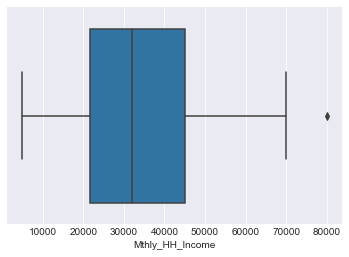

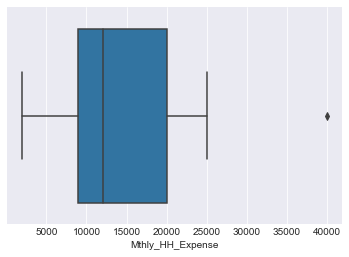

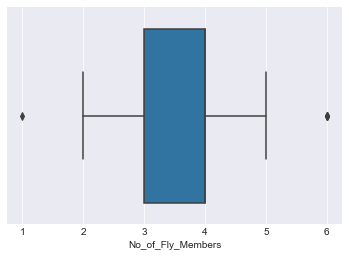

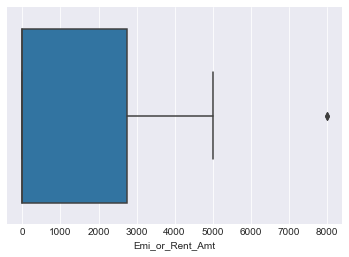

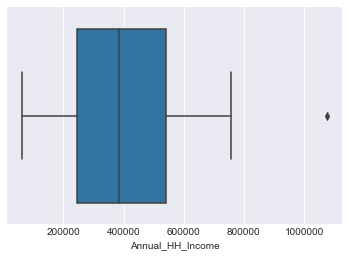

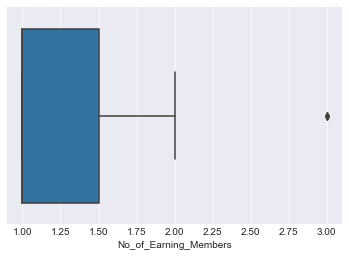

In [171]:
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
for i in df1.columns:
    sns.boxplot(df1[i])
    plt.show()

In [149]:
df1=df.copy()
df1.drop(['Highest_Qualified_Member'], inplace=True, axis=1)

In [150]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Mthly_HH_Income           26825.0
Mthly_HH_Expense          15000.0
No_of_Fly_Members             2.0
Emi_or_Rent_Amt            3500.0
Annual_HH_Income         335970.0
No_of_Earning_Members         1.0
dtype: float64


In [151]:
#removing the outlier
df1 = df1[~((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
df1.shape

(39, 6)

In [153]:
df.shape

(50, 7)

### Calculate of Mean Median Mode of all the features with and without library


<h3>Mean</h3>
<p>
<strong>Mean</strong> is an essential concept in mathematics and statistics. The mean is the average or the most common value in a collection of numbers. In statistics, it is a measure of central tendency of a probability distribution along median and mode. It is also referred to as an expected value.
</p>

$$\Large \bar {X} =   \frac {\sum {X}} {n} $$


<h3>Median</h3>
<p>
The <strong>median</strong> is the middle number in a sorted, ascending or descending, list of numbers and can be more descriptive of that data set than the average. The <strong>median</strong> is sometimes used as opposed to the <strong>mean</strong> when there are outliers in the sequence that might skew the average of the values.
</p>

$$\Large median=(\frac {n+1}2 )^{th} observation \:, \:if\:n\:is\:odd $$

$$\Large median= [([(\frac {n+1}2 )^{th} + (\frac {n}2 )^{th}]observation) \div 2] , \:if\:n\:is\:even $$



<h3>Mode</h3>
<p>
The <strong>mode</strong> is the value that appears most frequently in a data set. A set of data may have one <strong>mode</strong>, more than one <strong>mode</strong>, or no <strong>mode</strong> at all. Other popular measures of central tendency include the mean, or the average of a set, and the median, the middle value in a set.

</p>

$$\Large M_o= l+ ((f_1 - f_0) / (2f_1 -f_0 - f_2))h $$

$$ Where:$$

$$ l = \:lower \: limit\: of\: the \:modal \:class $$ 

$$ h= \:size \:of \:the \:class \:interval $$

$$ f_1 = \:frequency \:of \:the \:modal \:class $$

$$ f_0 = \:frequency \:of \:the \:class \:preceding \:the \:modal \:class $$

$$ f_2 = \:frequency \:of \:the \:class \:succeedig \:the \:modal \:class $$




In [154]:
def cal_mean(d):
    n=len(d)
    get_sum=sum(d)
    mean=get_sum/n
    print("Mean/Average is: " + str(mean))

In [155]:
def cal_median(d):
    n=len(d)
    d.sort_values()

    if n%2==0:
        median1 = d[n//2]
        median2 = d[n//2-1]
        median = (median1 + median2)/2
    else:
        median = d[n//2]
    print('Median is : ' + str(median))

In [156]:
from collections import Counter
def cal_mode(d):
    n = len(d)
    data = Counter(d)
    get_mode = dict(data)
    mode = [k for k, v in get_mode.items() if v == max(list(data.values()))]
  
    if len(mode) == n:
        get_mode = "No mode found"
    else:
        get_mode = "Mode is / are: " + ', '.join(map(str, mode))
      
    print(get_mode)

In [157]:
for i in df1.columns:
    print(i)
    print('****************************')
    print('Mean')
    print('---------------------------')
    print('Without library')
    cal_mean(df[i])
    print('-------')
    print('With library')
    print('Mean/Average is: '+ str(df[i].mean()))
    print('\n')
    print('Median')
    print('-----------------------------')
    print('Without library')
    cal_median(df[i])
    print('---------')
    print('With library')
    print('Median is/are: '+ str(df[i].median()))
    print('\n')
    print('Mode')
    print('----------------------------')
    print('Without library')
    cal_mode(df[i])
    print('---------')
    print('With library')
    print('Mode is/are: '+ str(df[i].mode()))
    print('_____________________________________________')
    print('\n')
    
print('Highest_Qualified_Member') #Highest_Qualified_Member it is a categorical features we can't find mean and median
print('*************************')
cal_mode(df[i])
print('---------')
print('With library')
print('Mode is/are: '+ str(df[i].mode()))
print('_____________________________________________')
print('\n')

Mthly_HH_Income
****************************
Mean
---------------------------
Without library
Mean/Average is: 41558.0
-------
With library
Mean/Average is: 41558.0


Median
-----------------------------
Without library
Median is : 35000.0
---------
With library
Median is/are: 35000.0


Mode
----------------------------
Without library
Mode is / are: 45000
---------
With library
Mode is/are: 0    45000
dtype: int64
_____________________________________________


Mthly_HH_Expense
****************************
Mean
---------------------------
Without library
Mean/Average is: 18818.0
-------
With library
Mean/Average is: 18818.0


Median
-----------------------------
Without library
Median is : 18500.0
---------
With library
Median is/are: 15500.0


Mode
----------------------------
Without library
Mode is / are: 25000
---------
With library
Mode is/are: 0    25000
dtype: int64
_____________________________________________


No_of_Fly_Members
****************************
Mean
-------------

<h3>Varience</h3>
<p>
The <strong>variance</strong> is a measure of variability. It is calculated by taking the average of squared deviations from the mean. <strong>variance</strong> tells you the degree of spread in your data set. The more spread the data, the larger the <strong>variance</strong> is in relation to the mean.

Unlike range and quartiles, the variance combines all the values in a data set to produce a measure of spread. We know that variance is a measure of how spread out a data set is. It is calculated as the average squared deviation of each number from the mean of a data set

</p>

$$\Large s^2 =[\sum (x_i - \bar x)^2]/ (n-1)$$

$$\Large s^2 = \:sample \:varience$$

$$\Large x_i = \:the \:value \:of \:the \:one \:observation$$

$$\Large \bar x = \:the \:mean \:value \:of \:all \:observation$$

$$\Large n= \:the \:number \:of \:observations$$

In [158]:
### calculate variance with and without library

def variance(data, ddof=0):
     n = len(data)
     mean = sum(data) / n
     var = sum((x - mean) ** 2 for x in data) / (n - ddof)
     print(var)

In [159]:
import numpy as np
for i in df1.columns: 
    print(i)
    print("**********************")
    print('The variance value:')
    print('-------------')
    print('Without using library function')
    variance(df[i])
    print('--------')
    print('With using library function')
    print(np.var(df[i]))
    print('_________________________________________________')
    print('\n')

Mthly_HH_Income
**********************
The variance value:
-------------
Without using library function
667478836.0
--------
With using library function
667478836.0
_________________________________________________


Mthly_HH_Expense
**********************
The variance value:
-------------
Without using library function
143249876.0
--------
With using library function
143249876.0
_________________________________________________


No_of_Fly_Members
**********************
The variance value:
-------------
Without using library function
2.2564
--------
With using library function
2.2564
_________________________________________________


Emi_or_Rent_Amt
**********************
The variance value:
-------------
Without using library function
38176400.0
--------
With using library function
38176400.0
_________________________________________________


Annual_HH_Income
**********************
The variance value:
-------------
Without using library function
100437186889.95831
--------
With usi

### Population standard deviation:
When you have collected data from every member of the population that you’re interested in, you can get an exact value for population standard deviation.

$$\Large \sigma= \sqrt {\frac {\sum (  X  - \mu)^2}{N}} $$

$$\large \sigma= \:population \:standard \:deviation $$

$$\large X= \:each \:value $$

$$\large \mu= \:population \:mean $$

$$\large N = \:number \:of \:values \:in \:the \:population $$


### Sample standard deviation:
When you collect data from a sample, the sample standard deviation is used to make estimates or inferences about the population standard deviation.
​
$$\Large S = \sqrt {\frac {\sum (  X  - \bar x)^2}{n-1}} $$
​
$$\large S = \:sample \:standard \:deviation $$
​
$$\large X= \:each \:value $$
​
$$\large \bar x = \:sample \:mean $$
​
$$\large n = \:number \:of \:values \:in \:the \:sample $$

In [160]:
# calculatee standered deviation

import math


def variance_std(data, ddof=0):
     n = len(data)
     mean = sum(data) / n
     return sum((x - mean) ** 2 for x in data) / (n - ddof)


def stdev(data):
     var = variance_std(data)
     std_dev = math.sqrt(var)
     print(std_dev) 

In [161]:
for i in df1.columns:
    print(i)
    print('*'*20)
    print('Standered Deviation')
    print('-'*15)
    print('Without using library')
    stdev(df[i])
    print('-'*5)
    print('With using library')
    print(df[i].std())
    print('_'*30)
    print('\n')

Mthly_HH_Income
********************
Standered Deviation
---------------
Without using library
25835.611779092826
-----
With using library
26097.908978713687
______________________________


Mthly_HH_Expense
********************
Standered Deviation
---------------
Without using library
11968.704023410388
-----
With using library
12090.216824240286
______________________________


No_of_Fly_Members
********************
Standered Deviation
---------------
Without using library
1.502131818450032
-----
With using library
1.5173822786601394
______________________________


Emi_or_Rent_Amt
********************
Standered Deviation
---------------
Without using library
6178.705366013175
-----
With using library
6241.434947516607
______________________________


Annual_HH_Income
********************
Standered Deviation
---------------
Without using library
316918.26531451027
-----
With using library
320135.79212252516
______________________________


No_of_Earning_Members
********************
S

### Correlation:
Correlation is a statistical technique that can show whether and how strongly pairs of variables are related.
The main result of a correlation is called the **correlation coefficient** (or “r”). It ranges from -1.0 to +1.0. The closer r is to +1 or -1, the more closely the two variables are related.
If r is close to 0, it means there is no relationship between the variables. If r is positive, it means that as one variable gets larger the other gets larger. If r is negative it means that as one gets larger, the other gets smaller (often called an “inverse” correlation).

### Covariance:
A quantitative measure of the joint variability between two or more variables.

$$ \Large cov(x,y)= \frac{1}{n} \sum^n_{i=1} (x_i -\bar x)(y_i -\bar y) $$

$$ \Large cor(x,y)= \frac {cov(x,y)} {\sqrt {var(x) var(y)}} $$

In [162]:
#correlation
df.corr(method ='pearson')

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
Mthly_HH_Income,1.000000,0.649215,0.448317,0.036976,0.970315,0.347883
Mthly_HH_Expense,0.649215,1.000000,0.639702,0.405280,0.591222,0.311915
No_of_Fly_Members,0.448317,0.639702,1.000000,0.085808,0.430868,0.597482
Emi_or_Rent_Amt,0.036976,0.405280,0.085808,1.000000,0.002716,-0.097431
Annual_HH_Income,0.970315,0.591222,0.430868,0.002716,1.000000,0.296679
No_of_Earning_Members,0.347883,0.311915,0.597482,-0.097431,0.296679,1.000000


In [163]:

df.corr(method='kendall')

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
Mthly_HH_Income,1.000000,0.483825,0.365908,-0.025749,0.872913,0.280929
Mthly_HH_Expense,0.483825,1.000000,0.565001,0.333334,0.472894,0.302092
No_of_Fly_Members,0.365908,0.565001,1.000000,0.088261,0.347993,0.494580
Emi_or_Rent_Amt,-0.025749,0.333334,0.088261,1.000000,-0.018410,-0.115936
Annual_HH_Income,0.872913,0.472894,0.347993,-0.018410,1.000000,0.234381
No_of_Earning_Members,0.280929,0.302092,0.494580,-0.115936,0.234381,1.000000


In [164]:
df.corr(method='spearman')

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
Mthly_HH_Income,1.000000,0.638239,0.472465,-0.036038,0.967111,0.349288
Mthly_HH_Expense,0.638239,1.000000,0.680914,0.438615,0.633355,0.369241
No_of_Fly_Members,0.472465,0.680914,1.000000,0.101111,0.460407,0.549010
Emi_or_Rent_Amt,-0.036038,0.438615,0.101111,1.000000,-0.026200,-0.136951
Annual_HH_Income,0.967111,0.633355,0.460407,-0.026200,1.000000,0.293100
No_of_Earning_Members,0.349288,0.369241,0.549010,-0.136951,0.293100,1.000000


<h2>Checking Skewness and Kurtosis</h2>
<h3>Skewness</h3>
In statistics, skewness is a measure of the asymmetry of the probability distribution of a random variable about its mean. In other words, skewness tells you the amount and direction of skew (departure from horizontal symmetry). The skewness value can be positive or negative, or even undefined. If skewness is 0, the data are perfectly symmetrical, although it is quite unlikely for real-world data. As a general rule of thumb:<br>
<br>
If skewness is less than -1 or greater than 1, the distribution is highly skewed.<br>
If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.<br>
If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.<br>
<h3>Kurtosis</h3>
<p>
### Kurtosis:

In probability theory and statistics, kurtosis (from Greek: κυρτός, kyrtos or kurtos, meaning "curved, arching") is a measure of the "tailedness" of the probability distribution of a real-valued random variable. Like skewness, kurtosis describes the shape of a probability distribution and there are different ways of quantifying it for a theoretical distribution and corresponding ways of estimating it from a sample from a population. Different measures of kurtosis may have different interpretations.

The standard measure of a distribution's kurtosis, originating with Karl Pearson, is a scaled version of the fourth moment of the distribution. This number is related to the tails of the distribution, not its peak;hence, the sometimes-seen characterization of kurtosis as "peakedness" is incorrect. For this measure, higher kurtosis corresponds to greater extremity of deviations (or outliers), and not the configuration of data near the mean.

The kurtosis of any univariate normal distribution is 3. It is common to compare the kurtosis of a distribution to this value. Distributions with kurtosis less than 3 are said to be platykurtic, although this does not imply the distribution is "flat-topped" as is sometimes stated. Rather, it means the distribution produces fewer and less extreme outliers than does the normal distribution. An example of a platykurtic distribution is the uniform distribution, which does not produce outliers. Distributions with kurtosis greater than 3 are said to be leptokurtic. An example of a leptokurtic distribution is the Laplace distribution, which has tails that asymptotically approach zero more slowly than a Gaussian, and therefore produces more outliers than the normal distribution. It is also common practice to use an adjusted version of Pearson's kurtosis, the excess kurtosis, which is the kurtosis minus 3, to provide the comparison to the standard normal distribution. Some authors use "kurtosis" by itself to refer to the excess kurtosis. For clarity and generality, however, this article follows the non-excess convention and explicitly indicates where excess kurtosis is meant.
<p>


### Pearson moments:

$$ \Large Kurt[X]= E[  (\frac{X- \mu}{\sigma})^4] = \frac {\mu ^4}{\sigma ^4} $$ 


Mthly_HH_Income
----------
Skewness : 0.9246148763777229
Kurtosis : 0.11555007146606489
Mean : 41558.0
Median : 35000.0


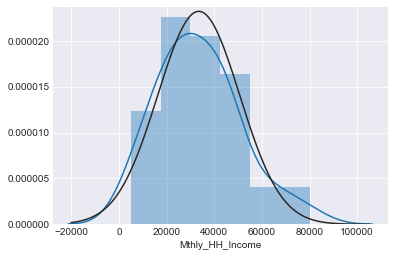



Mthly_HH_Expense
----------
Skewness : 1.1994608030097127
Kurtosis : 0.9424897886350738
Mean : 18818.0
Median : 15500.0


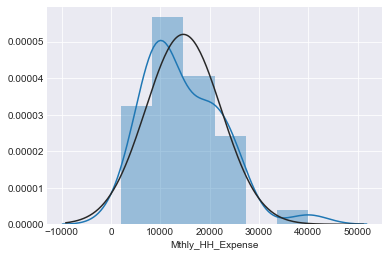



No_of_Fly_Members
----------
Skewness : 0.11367415455857431
Kurtosis : -0.8514445579758396
Mean : 4.06
Median : 4.0


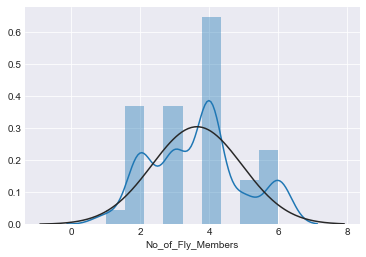



Emi_or_Rent_Amt
----------
Skewness : 3.403679844103547
Kurtosis : 14.202522820819258
Mean : 3060.0
Median : 0.0


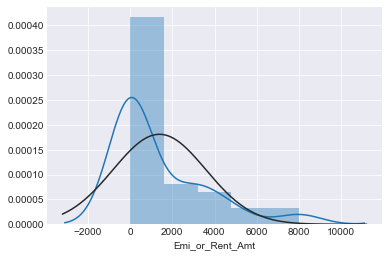



Annual_HH_Income
----------
Skewness : 1.1929490975818218
Kurtosis : 1.1012908548129197
Mean : 490019.04
Median : 447420.0


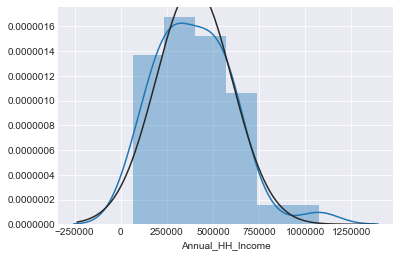



No_of_Earning_Members
----------
Skewness : 1.5933009869600223
Kurtosis : 2.0932124169928983
Mean : 1.46
Median : 1.0


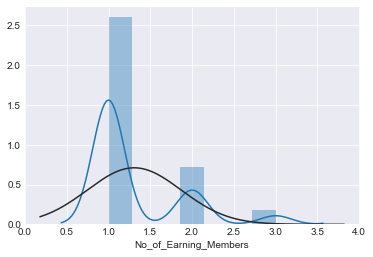

In [165]:
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
from scipy.stats import norm
for i in df1.columns:
     print(i)
     print('-'*10)
     print('Skewness : ' + str(df[i].skew()))
     print('Kurtosis : '+str(df[i].kurt()))
     print('Mean : '+ str(df[i].mean()))
     print('Median : '+ str(df[i].median()))
     sns.distplot(df1[i], fit=norm)
     plt.show()
     print('\n')

Mthly_HH_Income
-------------------------
Lambda value used for Transformation: 0.5474369545638741
Mean value after transformation : 526.6578892113607
Mean value before transformation : 33484.61538461538


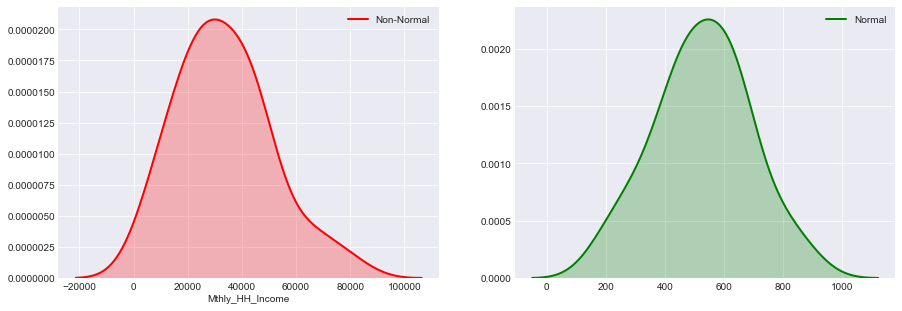





The mu and sigma value of fitted data
526.6578892113607 158.4922321697236
Mean + 1SD : 685.1501213810843
Mean - 1SD : 368.16565704163713
Mean + 2ND : 843.6423535508079
Mean - 2ND : 209.67342487191354
Mean + 3RD : 1002.1345857205315
Mean - 3RD : 51.181192702189946


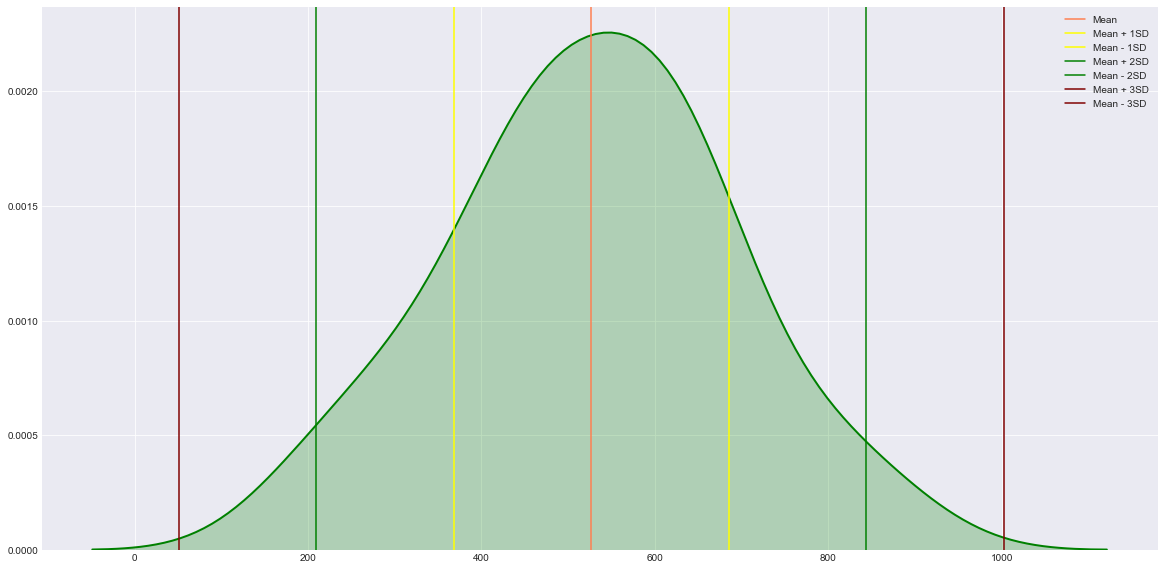

__________________________________________________


Mthly_HH_Expense
-------------------------
Lambda value used for Transformation: 0.36490304416414804
Mean value after transformation : 85.12982947083012
Mean value before transformation : 33484.61538461538


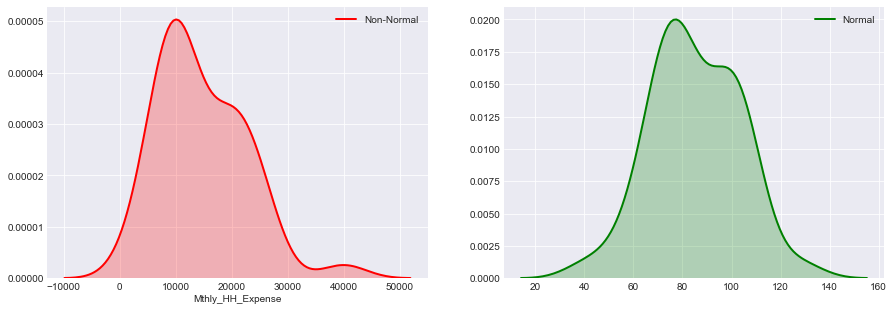





The mu and sigma value of fitted data
85.12982947083012 17.478423277558267
Mean + 1SD : 102.60825274838838
Mean - 1SD : 67.65140619327185
Mean + 2ND : 120.08667602594664
Mean - 2ND : 50.17298291571358
Mean + 3RD : 137.56509930350492
Mean - 3RD : 32.69455963815531


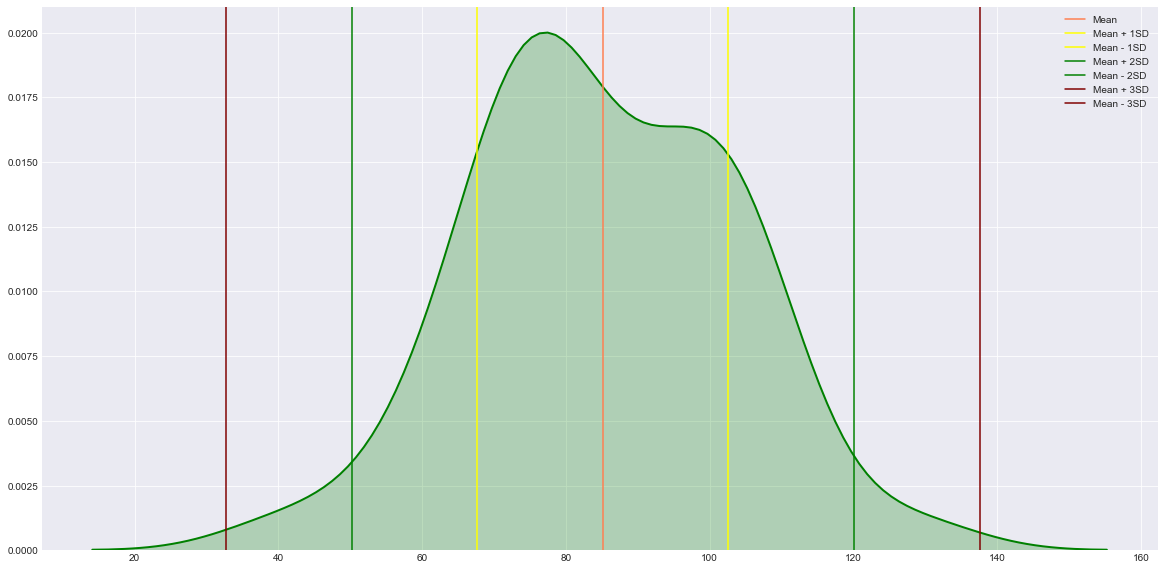

__________________________________________________


No_of_Fly_Members
-------------------------
Lambda value used for Transformation: 0.6775041848033131
Mean value after transformation : 2.013669374859754
Mean value before transformation : 33484.61538461538


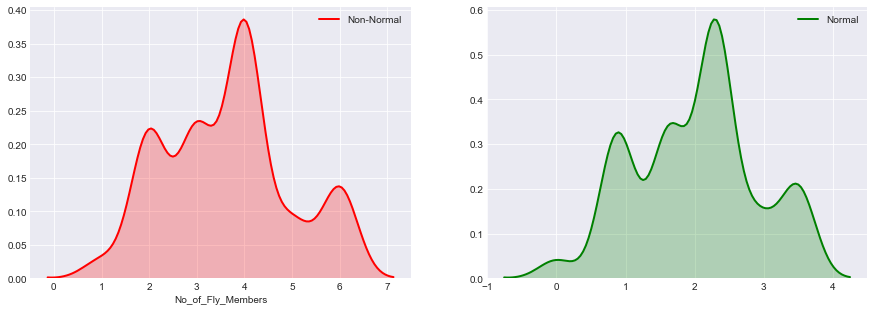





The mu and sigma value of fitted data
2.013669374859754 0.876398918134246
Mean + 1SD : 2.890068292994
Mean - 1SD : 1.137270456725508
Mean + 2ND : 3.766467211128246
Mean - 2ND : 0.2608715385912621
Mean + 3RD : 4.642866129262492
Mean - 3RD : -0.6155273795429839


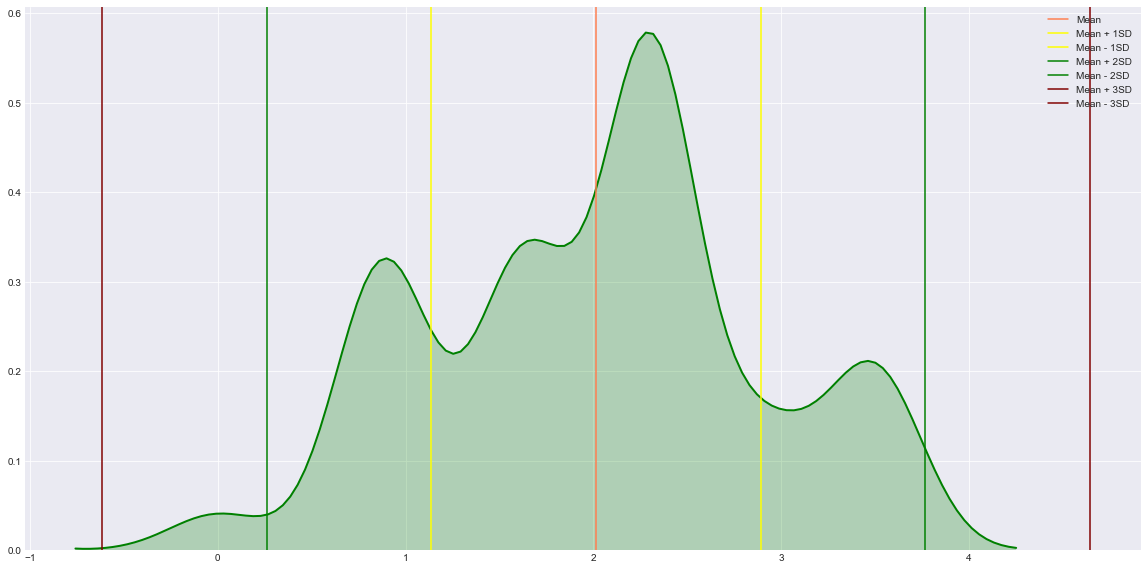

__________________________________________________


Annual_HH_Income
-------------------------
Lambda value used for Transformation: 0.5164011182386036
Mean value after transformation : 1449.6598223605963
Mean value before transformation : 33484.61538461538


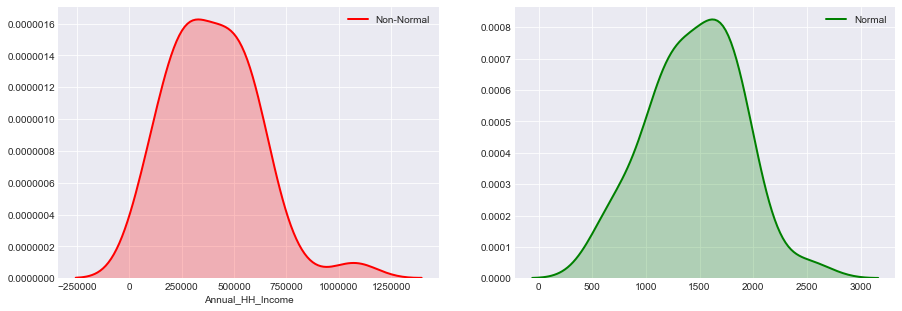





The mu and sigma value of fitted data
1449.6598223605963 416.77250729730406
Mean + 1SD : 1866.4323296579005
Mean - 1SD : 1032.8873150632921
Mean + 2ND : 2283.2048369552044
Mean - 2ND : 616.1148077659882
Mean + 3RD : 2699.9773442525084
Mean - 3RD : 199.34230046868402


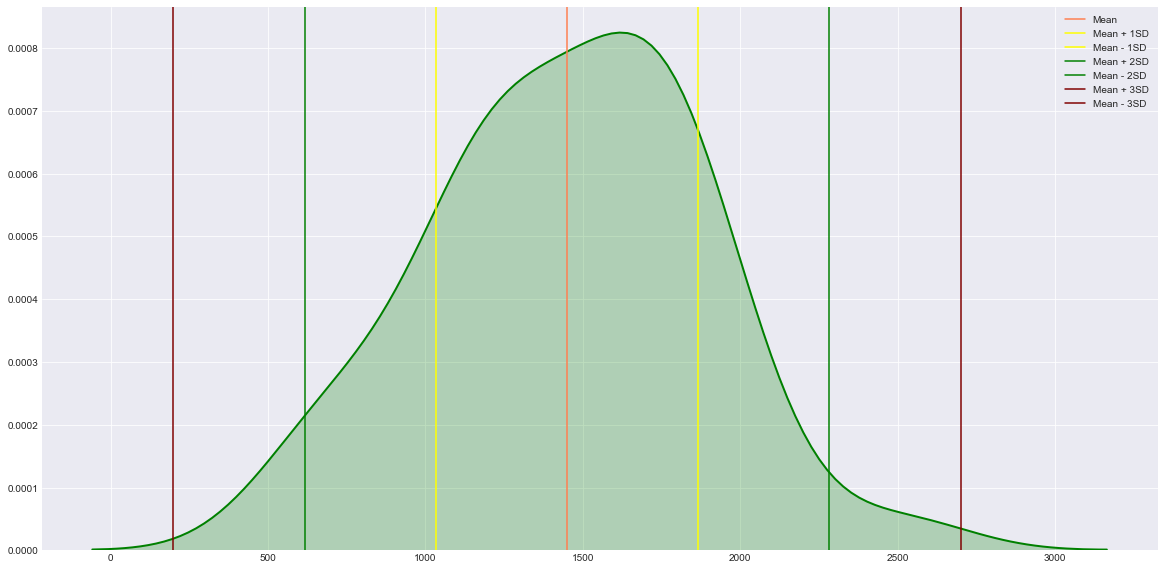

__________________________________________________


No_of_Earning_Members
-------------------------
Lambda value used for Transformation: -4.393919321310406
Mean value after transformation : 0.056041624938830546
Mean value before transformation : 33484.61538461538


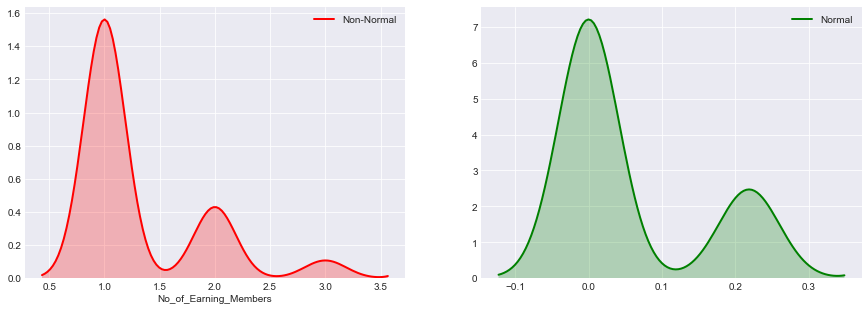





The mu and sigma value of fitted data
0.056041624938830546 0.09545286753008339
Mean + 1SD : 0.15149449246891394
Mean - 1SD : -0.039411242591252844
Mean + 2ND : 0.24694735999899733
Mean - 2ND : -0.13486411012133623
Mean + 3RD : 0.34240022752908067
Mean - 3RD : -0.2303169776514196


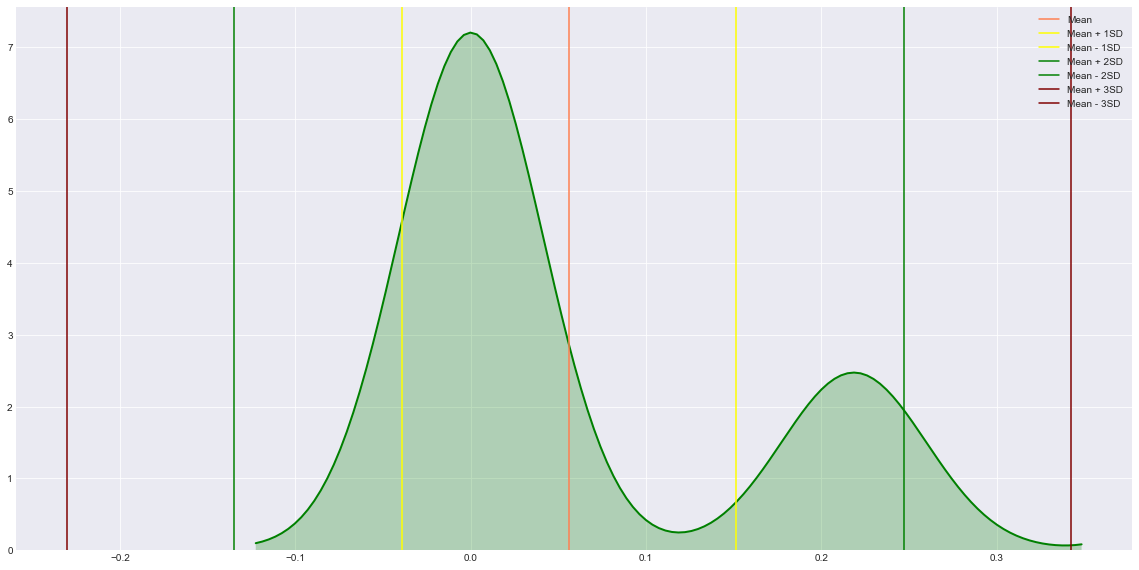

__________________________________________________




In [166]:
list1=df1[['Mthly_HH_Income', 'Mthly_HH_Expense', 'No_of_Fly_Members',
        'Annual_HH_Income', 'No_of_Earning_Members']]
from scipy import stats
for i in list1:
    print(i)
    print('-'*25)
    
    fitted_data, fitted_lambda = stats.boxcox(list1[i]) #boxcox transformation
    fig, ax = plt.subplots(1,2)
    sns.distplot(list1[i], hist = False, kde = True,
                kde_kws = {'shade': True, 'linewidth': 2}, 
                label = "Non-Normal", color ="red", ax=ax[0]) #before transformation
    sns.distplot(fitted_data, hist = False, kde = True,
                kde_kws = {'shade': True, 'linewidth': 2}, 
                label = "Normal", color ="green", ax = ax[1]) #after transformation.
    plt.legend(loc = "upper right")
    fig.set_figheight(5)
    fig.set_figwidth(15)
    print(f"Lambda value used for Transformation: {fitted_lambda}")
    print(f'Mean value after transformation : {fitted_data.mean()}')
    print(f'Mean value before transformation : {df1.Mthly_HH_Income.mean()}')
    plt.show()
    print('\n')



    # fitted data!! 
    print('\n')
    mu_normal = fitted_data.mean() #mean 

    sigma_normal = fitted_data.std() #std
    print('The mu and sigma value of fitted data')
    print(mu_normal, sigma_normal)

    #1std, 2std, 3std
    one_std_right = mu_normal + (1 * sigma_normal)
    print('Mean + 1SD : '+str(one_std_right))
    one_std_left = mu_normal - (1 * sigma_normal)
    print('Mean - 1SD : '+str(one_std_left))
    two_std_right = mu_normal + (2 * sigma_normal)
    print('Mean + 2ND : '+str(two_std_right))
    two_std_left = mu_normal - (2 * sigma_normal)
    print('Mean - 2ND : '+str(two_std_left))
    three_std_right = mu_normal + (3 * sigma_normal)
    print('Mean + 3RD : '+str(three_std_right))
    three_std_left = mu_normal - (3 * sigma_normal)
    print('Mean - 3RD : '+str(three_std_left))

    #graph plot !!
    plt.figure(figsize=(20,10))
    sns.set_style("darkgrid")
    sns.distplot(fitted_data, hist = False, kde = True,
                kde_kws = {'shade': True, 'linewidth': 2}, 
                color ="green")

    plt.axvline(mu_normal, color='coral', label='Mean')

    plt.axvline(one_std_right, color='yellow', label='Mean + 1SD')
    plt.axvline(one_std_left, color='yellow', label='Mean - 1SD')
    plt.axvline(two_std_right, color='green', label='Mean + 2SD')
    plt.axvline(two_std_left, color='green', label='Mean - 2SD')
    plt.axvline(three_std_right, color='maroon', label='Mean + 3SD')
    plt.axvline(three_std_left, color='maroon', label='Mean - 3SD')
    plt.legend()
    plt.show()
    print('_'*50)
    print('\n')

<h3>Q-Q plot</h3>
<p>
A Q-Q plot is a scatterplot created by plotting two sets of quantiles against one another. If both sets of quantiles came from the same distribution, we should see the points forming a line that's roughly straight. Here's an example of a Normal Q-Q plot when both sets of quantiles truly come from Normal distributions.
</p>
<p>
The quantile-quantile (q-q) plot is a graphical technique for determining if two data sets come from populations with a common distribution. A q-q plot is a plot of the quantiles of the first data set against the quantiles of the second data set. A 45-degree reference line is also plotted.
</p>

Mthly_HH_Income
-------------------------
The QQ plot before boxcox transformation


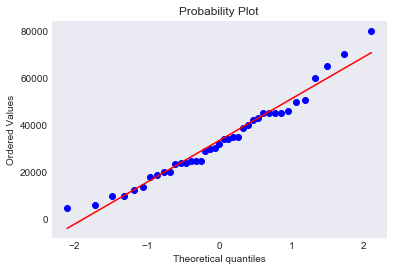



The QQ plot after boxcox transformation


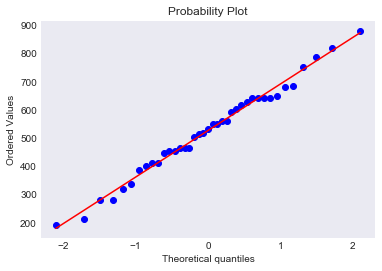



Mthly_HH_Expense
-------------------------
The QQ plot before boxcox transformation


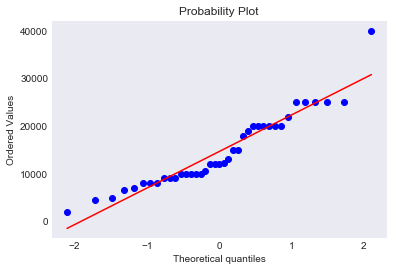



The QQ plot after boxcox transformation


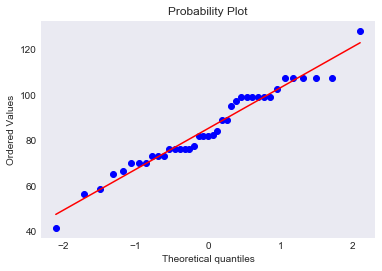



No_of_Fly_Members
-------------------------
The QQ plot before boxcox transformation


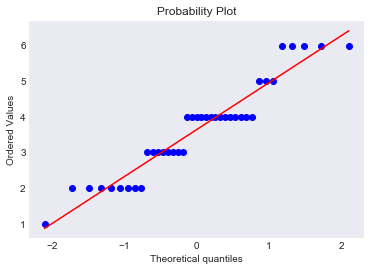



The QQ plot after boxcox transformation


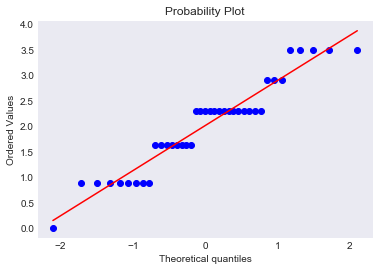



Annual_HH_Income
-------------------------
The QQ plot before boxcox transformation


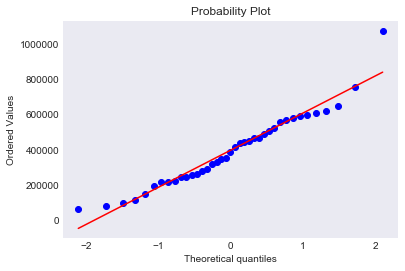



The QQ plot after boxcox transformation


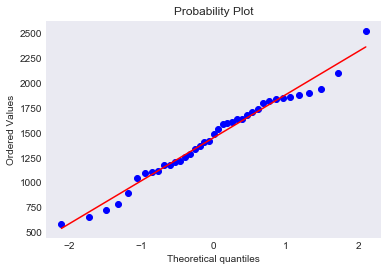



No_of_Earning_Members
-------------------------
The QQ plot before boxcox transformation


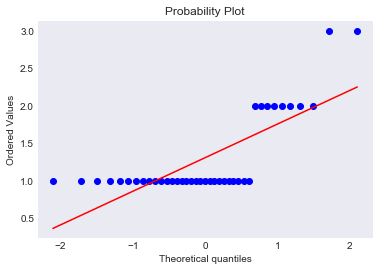



The QQ plot after boxcox transformation


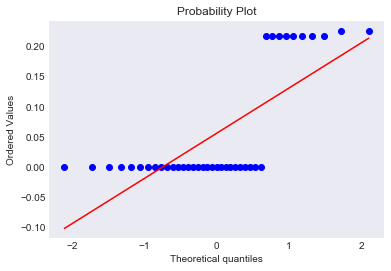

In [167]:
    # The QQ plot before boxcox transformation!!
for i in list1:
        print(i)
        print('-'*25)
        fitted_data, fitted_lambda = stats.boxcox(list1[i])
        print('The QQ plot before boxcox transformation')
        stats.probplot(list1[i], dist="norm", plot=plt)

        plt.grid()
        plt.show()
        print('\n')

        # The QQ plot after boxcox transformation!!
        print('The QQ plot after boxcox transformation')
        stats.probplot(fitted_data, dist="norm", plot=plt)

        plt.grid()
        plt.show()
        print('\n') 